# 📊 Hoax News Dataset Analysis & Model Evaluation

This notebook provides a comprehensive **before-and-after comparison** of the dataset used in our hoax news detection project and evaluates the performance of the machine learning model.

### Notebook Sections:
1. Dataset Overview: Raw vs Cleaned
2. Token & Text Analysis
3. Label Distribution & Cleaning Impact
4. Model Performance Metrics


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

sns.set(style="whitegrid")


In [11]:
# Load raw Excel files
raw_files = {
    "cnn": pd.read_excel("../dataset/cnn.xlsx"),
    "kompas": pd.read_excel("../dataset/kompas.xlsx"),
    "tempo": pd.read_excel("../dataset/tempo.xlsx"),
    "turnbackhoax": pd.read_excel("../dataset/turnbackhoax.xlsx")
}

# Load cleaned CSVs
cleaned_files = {
    "cnn": pd.read_csv("../cleandataset/cnn_cleaned.csv"),
    "kompas": pd.read_csv("../cleandataset/kompas_cleaned.csv"),
    "tempo": pd.read_csv("../cleandataset/tempo_cleaned.csv"),
    "turnbackhoax": pd.read_csv("../cleandataset/turnbackhoax_cleaned.csv")
}


In [12]:
for key in raw_files:
    print(f"=== {key.upper()} ===")
    print("🔹 Raw Sample:")
    display(raw_files[key].dropna().head(1))
    print("🔹 Cleaned Sample:")
    display(cleaned_files[key].dropna().head(1))
    print("\n")


=== CNN ===
🔹 Raw Sample:


,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0


🔹 Cleaned Sample:


,text,label,cleaned
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0,anies di milad bkmt aji hasil ibu ibu tahu man...




=== KOMPAS ===
🔹 Raw Sample:


,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
1,1,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...","Kompas.com - 21/02/2023, 14:22 WIB","JAKARTA, KOMPAS.com - Pemerintah menargetkan p...",Jakarta;Ekonomi 2024,Penulis Yohana Artha Uly | Editor Aprillia Ika,http://money.kompas.com/read/2023/02/21/142238...,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...",0


🔹 Cleaned Sample:


,text,label,cleaned
0,"Efek Ekor Jas Pencalonan Anies, Elektabilitas ...",0,efek ekor jas calon anies elektabilitas nasdem...




=== TEMPO ===
🔹 Raw Sample:


,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,"Sabtu, 1 Januari 2022 17:14 WIB","TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...",Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...,Reporter Egi Adyatama Editor Aditya Budiman,https://nasional.tempo.co/read/1545504/maruf-a...,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,0


🔹 Cleaned Sample:


,text,label,cleaned
0,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,0,ma ruf amin akan saksi lagi timnas indonesia v...




=== TURNBACKHOAX ===
🔹 Raw Sample:


,index,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU A...,1


🔹 Cleaned Sample:


,text,label,cleaned
0,“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU A...,1,bisa lihat si onta yaman nggak peduli itu apa ...


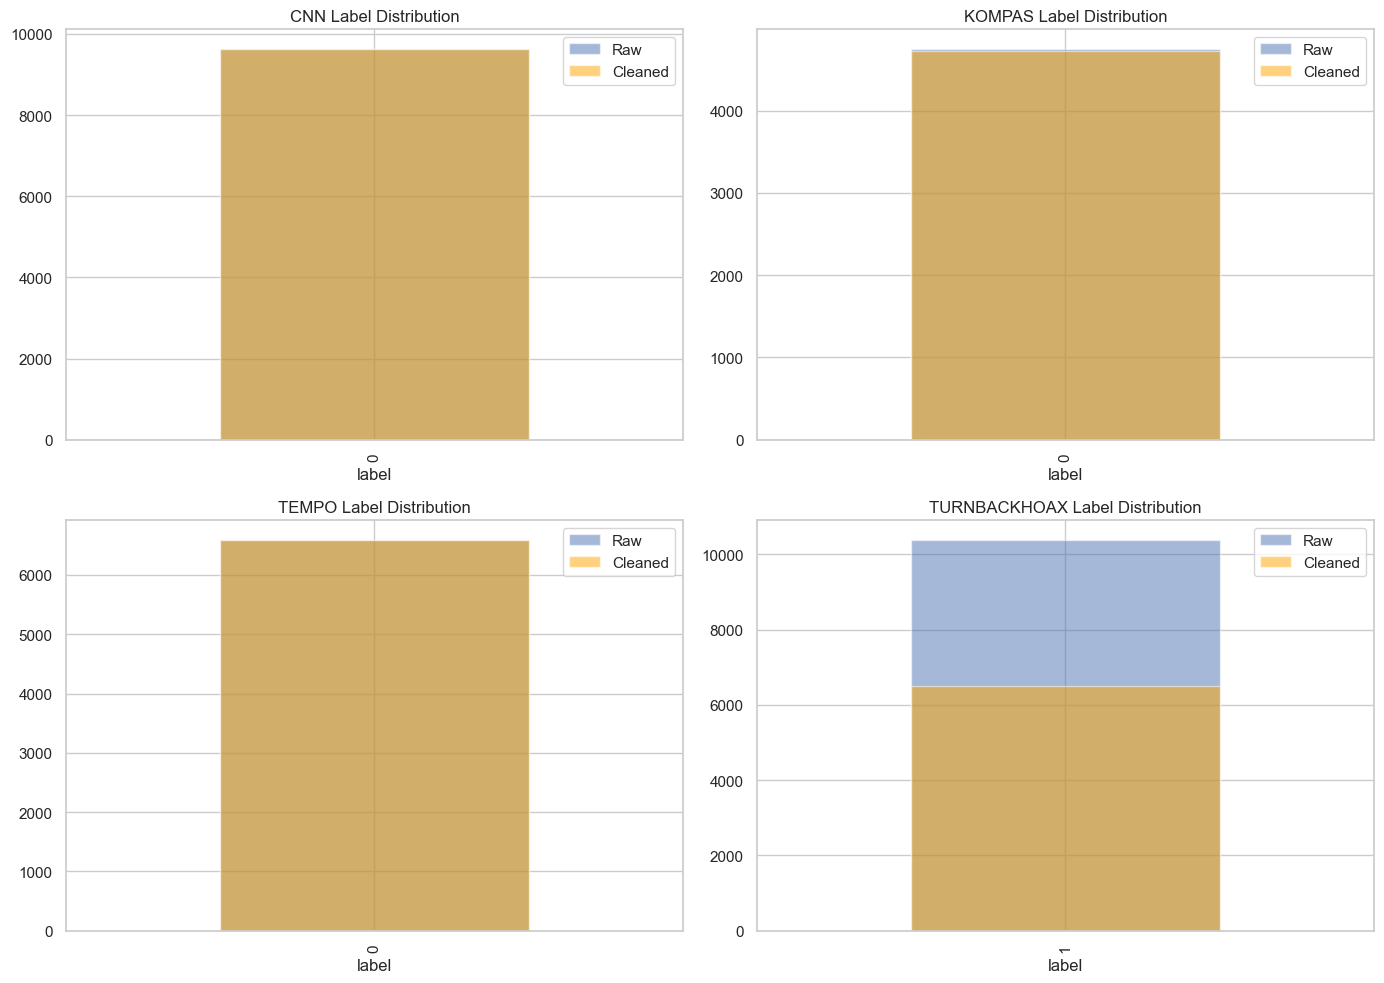

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, key in enumerate(raw_files):
    ax = axs[i]
    raw = raw_files[key]
    cleaned = cleaned_files[key]
    label_col = "hoax" if "hoax" in raw.columns else ("label" if "label" in raw.columns else raw.columns[-1])
    raw_label_counts = raw[label_col].value_counts()
    cleaned_label_counts = cleaned["label"].value_counts()

    raw_label_counts.plot(kind="bar", alpha=0.5, ax=ax, label="Raw")
    cleaned_label_counts.plot(kind="bar", alpha=0.5, ax=ax, label="Cleaned", color="orange")
    ax.set_title(f"{key.upper()} Label Distribution")
    ax.legend()

plt.tight_layout()
plt.show()


In [14]:
X_text_test, y_test, y_pred, y_proba, y_pred_thresh = joblib.load("../models/test_data.pkl")


Confusion Matrix:


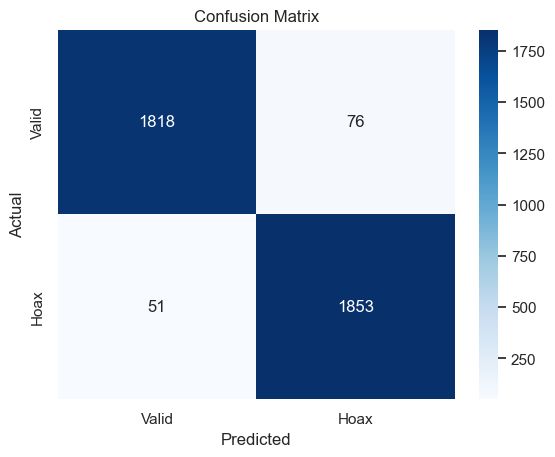

Accuracy Score: 0.9665613480779357
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1894
           1       0.96      0.97      0.97      1904

    accuracy                           0.97      3798
   macro avg       0.97      0.97      0.97      3798
weighted avg       0.97      0.97      0.97      3798



In [20]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Valid", "Hoax"], yticklabels=["Valid", "Hoax"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at

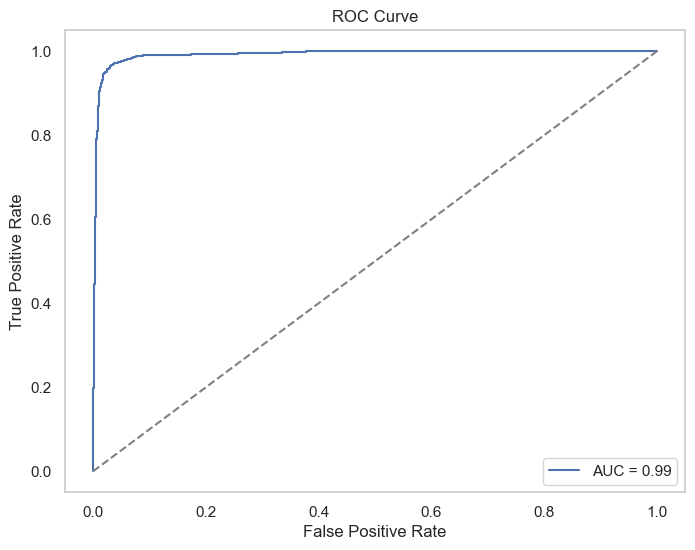

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Reload model and vectorizer
model = joblib.load("../models/hoax_model.pkl")
vectorizer = joblib.load("../models/vectorizer.pkl")

# Compute ROC curve
y_proba = model.predict_proba(vectorizer.transform(X_text_test))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


## 🛡️ Thresholded Prediction Analysis

We compare model predictions using the default threshold (0.5) and a stricter threshold (0.7) to reduce false positives.

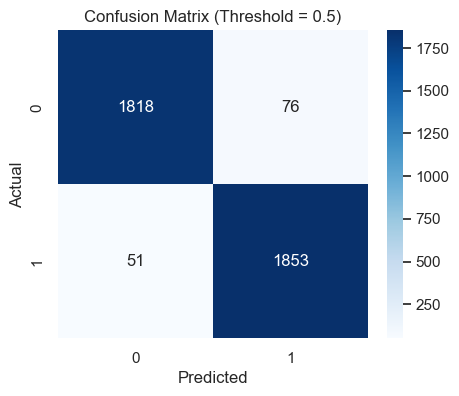

Classification Report (Default):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1894
           1       0.96      0.97      0.97      1904

    accuracy                           0.97      3798
   macro avg       0.97      0.97      0.97      3798
weighted avg       0.97      0.97      0.97      3798



In [17]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Default threshold (0.5)
conf_matrix_default = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report (Default):")
print(classification_report(y_test, y_pred))


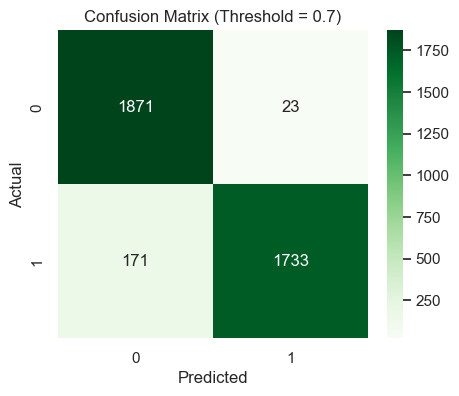

Classification Report (Threshold 0.7):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1894
           1       0.99      0.91      0.95      1904

    accuracy                           0.95      3798
   macro avg       0.95      0.95      0.95      3798
weighted avg       0.95      0.95      0.95      3798



In [18]:

# Thresholded at 0.7
conf_matrix_thresh = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_thresh, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Threshold = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report (Threshold 0.7):")
print(classification_report(y_test, y_pred_thresh))
